In [1]:
%run pylib/machine_learning dark
self = ML(title='Machine Learning -- UW model',  model='uw'  )
show(self.setup_output)

# Machine Learning -- UW model

<h5 style="text-align:right; margin-right:15px"> 2023-10-20 13:33</h5>

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f22cff06bf0>

In [2]:
self.df['association'] = self.df.apply(lambda row: row.association if row.class1!='unk' else 'unk', axis=1)

### Confusion analysis, test size = 25.0 %
* Model: SVC(C=1, gamma=2, probability=True)<br>
* Features: ['log_var', 'uw_d', 'uw_log_fpeak', 'uw_log_epeak']<br>
Accuracy: 86%

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f22cae6c5b0>
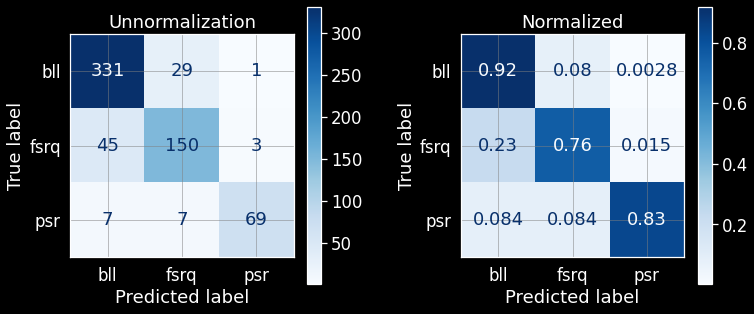

In [3]:
self.train_predict(show_confusion=True)

### Predicted pulsar probabilites for curved unid

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f2299fbc070>
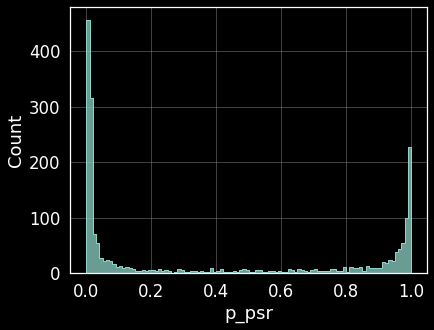

In [21]:
q = f'association=="unid" & uw_d>0.2 & uw_log_epeak<{np.log10(0.5)}'
pp = self.predict_prob()
show(f"""### Predicted pulsar probabilites for curved unid""") 
show(
    sns.histplot( pp, x='p_psr', element='step', bins=100).figure
);

In [22]:
show("""### TRAPUM check""")
trapum_found=['4FGL J0131.7-5346', '4FGL J0739.6-4530', '4FGL J0749.8-4420',
       '4FGL J0836.6-6036', '4FGL J1208.0-6900', '4FGL J1544.2-2554',
       '4FGL J1603.3-6010', '4FGL J1639.0-2727', '4FGL J1830.7-2414',
       '4FGL J2056.4-5922']
u = pp.loc[trapum_found]
u['prediction'] = self.df.loc[u.index, 'prediction']
show(u)

### TRAPUM check

,p_bll,p_fsrq,p_psr,prediction
name,,,,
4FGL J0131.7-5346,0.111373,0.383851,0.504776,psr
4FGL J0739.6-4530,0.297033,0.416590,0.286377,psr
4FGL J0749.8-4420,0.075262,0.148995,0.775743,psr
4FGL J0836.6-6036,0.824653,0.149145,0.026202,bll
4FGL J1208.0-6900,0.000959,0.005241,0.993800,psr
4FGL J1544.2-2554,0.000477,0.003068,0.996455,psr
4FGL J1603.3-6010,0.001366,0.002012,0.996622,psr
4FGL J1639.0-2727,0.015647,0.007381,0.976972,psr
4FGL J1830.7-2414,0.067696,0.282390,0.649914,psr


## Predictions
        

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f22ca926dd0>
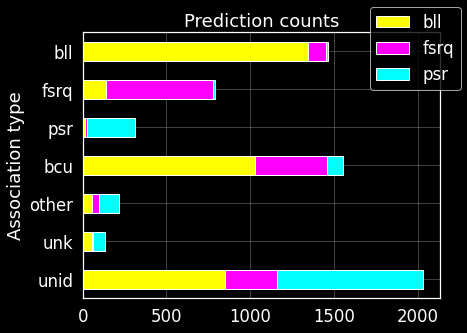

Notes:
* The target is the UNIDs, but applied to all
* BCUs mostly blazars, a check
* BLL, FSRQ, Pulsar look OK (a little redundant), a check

In [6]:
self.show_prediction_association() 

# Curvature vs. Peak energy

## 4FGL model

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f22ca7f7310>
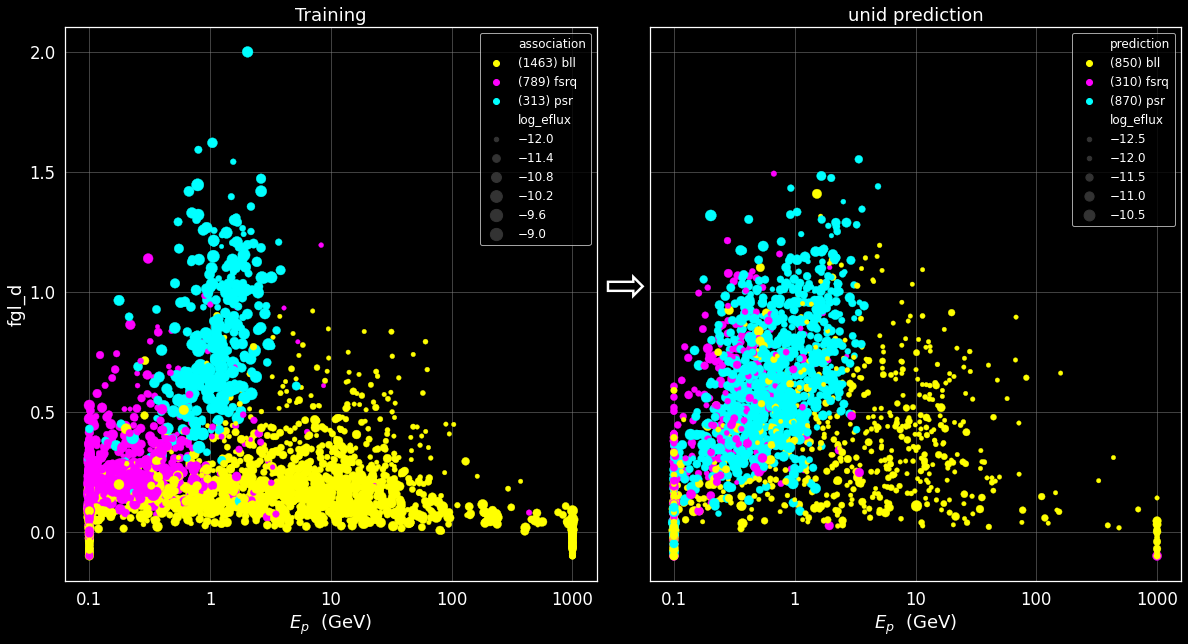

## UW model

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f22ca968af0>
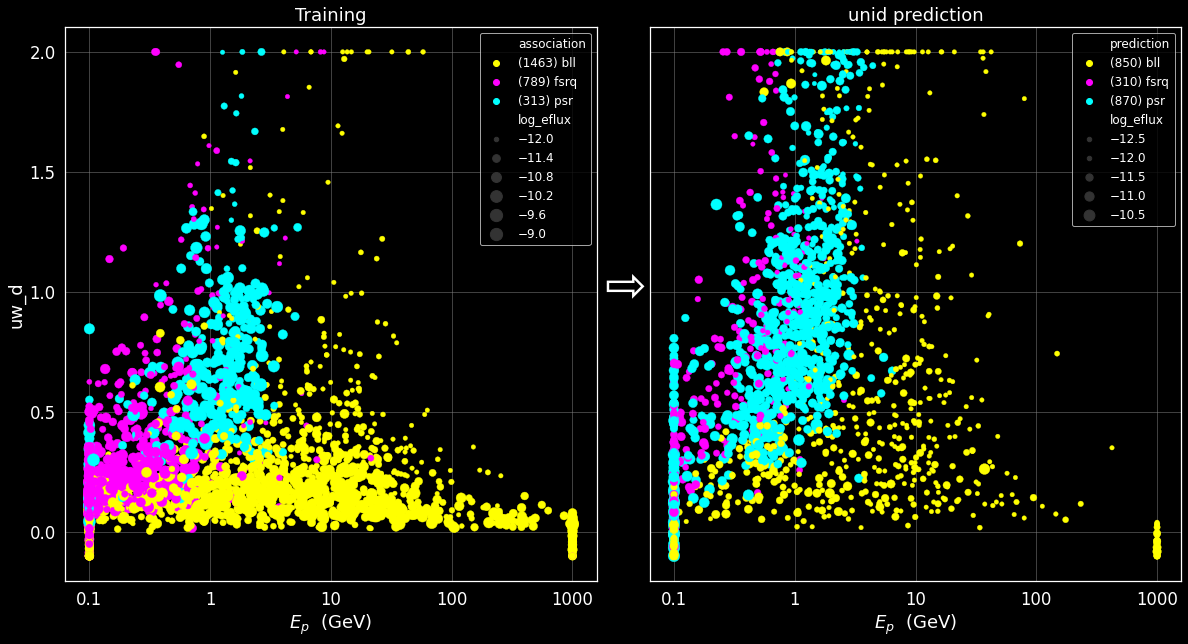

In [7]:
show('# Curvature vs. Peak energy')
show('## 4FGL model')
self.scatter_train_predict( x='fgl_log_epeak', y='fgl_d', **epeak_kw('x')) # caption="Curvature vs. Ep with 4FGL model", fignum=101,));
show('## UW model')
self.scatter_train_predict( x='uw_log_epeak', y='uw_d',**epeak_kw('x'))# caption="Curvature vs. Ep with UW model", fignum=100, );

In [8]:
df=self.df
show(df.query('prediction=="psr"').groupby('association').size())

association,bcu,bll,fsrq,other,psr,unid,unk
0,98,9,10,116,286,870,72


In [9]:
sdf = self.reformat()
show(sdf.groupby('source type').size())

* Load diffuse file,  `/mnt/c/users/thbur/OneDrive/fermi/diffuse/gll_iem_v07_hpx.fits`<br>  unit=$\rm{eV\ cm^{-2}\ s^{-1}\ deg^{-2}}$<br>  select energy= 893 MeV

source type,GC-psr,HMB-psr,MSP,RDG-psr,UNID-BLL,UNID-FSRQ,UNID-PSR,bcu-psr,bin-psr,bll-psr,fsrq-psr,gal-psr,glc,hmb-psr,lmb-psr,pwn-psr,rdg-psr,sbg-psr,sfr-psr,snr-psr,spp-psr,unk-psr,young
0,1,5,174,1,850,310,870,95,5,9,10,1,33,1,4,3,2,1,1,10,62,72,139


In [10]:
# show(f"""### Add diffuse flux to sources and add to summary  """)
# from pylib.diffuse import *
# diff = Diffuse()
# sdf['diffuse'] = diff.get_values_at(sdf)
# df['diffuse'] = diff.get_values_at(df)
# summary_file = 'files/summary.csv'
# sdf.to_csv(summary_file, float_format='%.3f') 
# show(f'* Write {len(sdf)}-record summary with {len(sdf.columns)} columns to `{summary_file}`')
# df['source_type'] = df.apply(lambda rec: rec.association+'-'+rec.prediction, axis=1)
# df.groupby('source_type').size()

### Add diffuse flux to sources and add to summary  

* Load diffuse file,  `/mnt/c/users/thbur/OneDrive/fermi/diffuse/gll_iem_v07_hpx.fits`<br>  unit=$\rm{eV\ cm^{-2}\ s^{-1}\ deg^{-2}}$<br>  select energy= 893 MeV

* Write 2659-record summary with 9 columns to `files/summary.csv`

## Diffuse flux value at sources 

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f22ccb6d6f0>
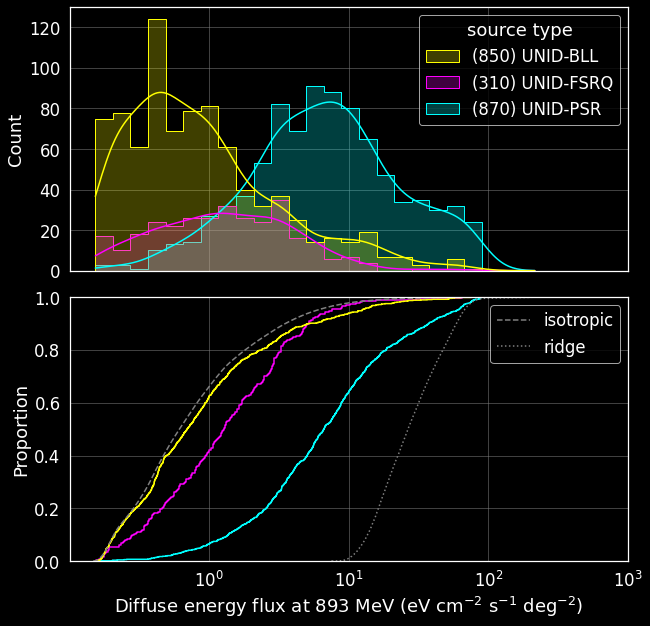

In [11]:
diff.show_diffuse_flux( sdf, hue_kw=dict(hue='source type', hue_order='UNID-BLL UNID-FSRQ UNID-PSR'.split(), palette=self.palette ))

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f22ca911210>
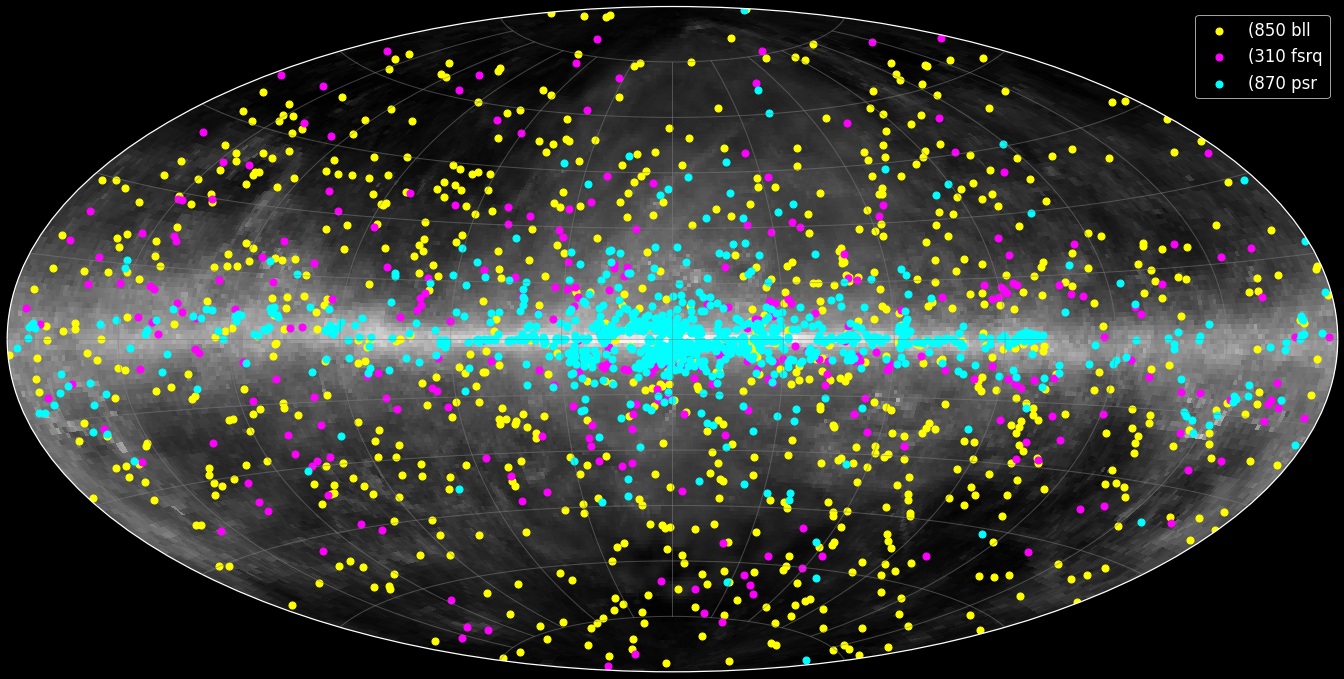

In [12]:
ax = diff.ait_plot()
for pred, color in zip('bll fsrq psr'.split(), self.palette):
    dfs = df.query(f'association=="unid" & prediction=="{pred}"')
    ax.scatter(dfs, s=50, label=f'({len(dfs)} {pred}', color=color )
    ax.legend()
show(ax.figure)

## Diffuse flux for bcu associations

<pylib.ipynb_docgen.doc_formatter.<locals>.MimeBundleObject at 0x7f22ca900790>
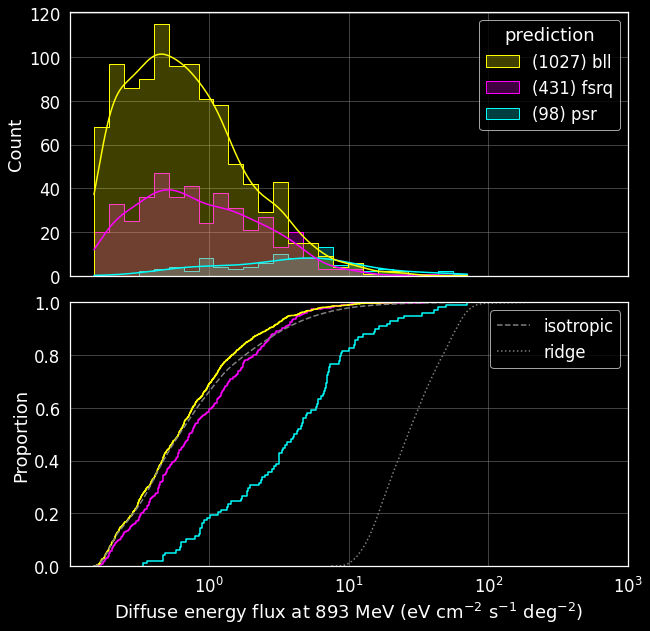

In [13]:
diff.show_diffuse_flux(df.query('association=="bcu"'),
                       hue_kw=dict(hue='prediction', palette=self.palette),
                        title="""## Diffuse flux for bcu associations""" )